<a href="https://colab.research.google.com/github/ImVikashKr/Bike-Sharing-Demand-Prediction/blob/main/Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [1]:
# Importing the library that are going to be used in this project

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from numpy import math
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import Ridge
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn import tree
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
from sklearn.preprocessing import MinMaxScaler
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import Lasso
from xgboost.sklearn import XGBRegressor
import warnings
from sklearn.linear_model import Lasso,Ridge


In [2]:
# Mounting google drive to access data from drive 
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# importing the data stored in goggle drive.
data = pd.read_csv("/content/drive/MyDrive/SeoulBikeData.csv", encoding= 'unicode_escape')

In [4]:
# Looking into data
data.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   
1  01/12/2017                204     1             -5.5           38   
2  01/12/2017                173     2             -6.0           39   
3  01/12/2017                107     3             -6.2           40   
4  01/12/2017                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes

In [5]:
# Number of rows and Columns 
data.shape

(8760, 14)

In [6]:
"""The information contains the number of columns, column labels, column data types, memory usage, range index, 
and the number of cells in each column (non-null values)."""
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [7]:
# Printing the list of columns 
list(data.columns)

['Date',
 'Rented Bike Count',
 'Hour',
 'Temperature(°C)',
 'Humidity(%)',
 'Wind speed (m/s)',
 'Visibility (10m)',
 'Dew point temperature(°C)',
 'Solar Radiation (MJ/m2)',
 'Rainfall(mm)',
 'Snowfall (cm)',
 'Seasons',
 'Holiday',
 'Functioning Day']

In [8]:
# checking null values
data.isna().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

Since null values don't even exist, there's no reason to remove them.

In [9]:
# Returning description of the data in the DataFrame.
data.describe().T

count         mean         std   min     25%  \
Rented Bike Count          8760.0   704.602055  644.997468   0.0  191.00   
Hour                       8760.0    11.500000    6.922582   0.0    5.75   
Temperature(°C)            8760.0    12.882922   11.944825 -17.8    3.50   
Humidity(%)                8760.0    58.226256   20.362413   0.0   42.00   
Wind speed (m/s)           8760.0     1.724909    1.036300   0.0    0.90   
Visibility (10m)           8760.0  1436.825799  608.298712  27.0  940.00   
Dew point temperature(°C)  8760.0     4.073813   13.060369 -30.6   -4.70   
Solar Radiation (MJ/m2)    8760.0     0.569111    0.868746   0.0    0.00   
Rainfall(mm)               8760.0     0.148687    1.128193   0.0    0.00   
Snowfall (cm)              8760.0     0.075068    0.436746   0.0    0.00   

                               50%      75%      max  
Rented Bike Count           504.50  1065.25  3556.00  
Hour                         11.50    17.25    23.00  
Temperature(°C)              13.70    22.50    39.40  
Humidity(%)                  57.00    74.00    98.00  
Wind speed (m/s)              1.50     2.30     7.40  
Visibility (10m)           1698.00  2000.00  2000.00  
Dew point temperature(°C)     5.10    14.80    27.20  
Solar Radiation (MJ/m2)       0.01     0.93     3.52  
Rainfall(mm)                  0.00     0.00    35.00  
Snowfall (cm)                 0.00     0.00     8.80

In [10]:
# The total number of entery of different seasons in Seasons column.
data['Seasons'].value_counts()

Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64

In [11]:
# The total number of entery of Holiday and No Holiday in Holiday column.
data['Holiday'].value_counts()

No Holiday    8328
Holiday        432
Name: Holiday, dtype: int64

In [12]:
# Count of Functioning Day
data['Functioning Day'].value_counts()

Yes    8465
No      295
Name: Functioning Day, dtype: int64

##Using bar graphs to show the number of rental bikes overall in relation to various characteristic values

Seasons
Autumn    1790002
Spring    1611909
Summer    2283234
Winter     487169
Name: Rented Bike Count, dtype: int64


Text(0.5, 1.0, 'Rented Bike sum vs Seasons')

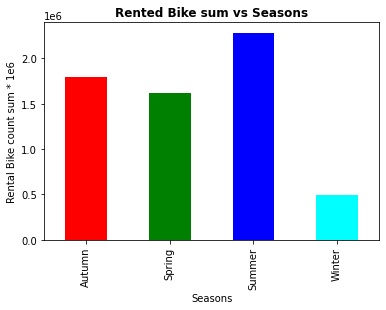

In [13]:
# Total count of Rented bike count for different seasons
print(data.groupby(['Seasons'])['Rented Bike Count'].sum())
data.groupby(['Seasons'])['Rented Bike Count'].sum().plot(kind="bar",color=['red', 'green', 'blue', 'cyan'])
plt.ylabel("Rental Bike count sum * 1e6")
plt.title("Rented Bike sum vs Seasons",fontweight="bold")

During the summer, a lot of bikes are rented as compared to other seasons.

Rental Bike Count for days on which there is a holiday: 499.75694444444446
Rental Bike Count for days on which there is no holiday: 715.2280259365995
Average Rented Bike count




Text(0.5, 1.0, 'Average Rental Bike Count for Holiday or No Holiday')

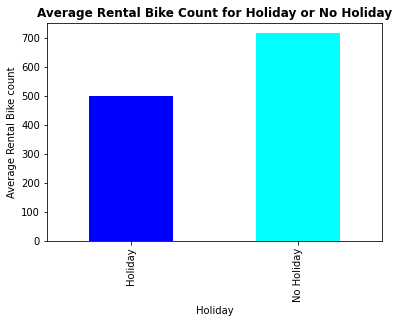

In [14]:
# Average Rented Bike count for different days depending on whether that day is a holiday or not

print("Rental Bike Count for days on which there is a holiday:",data[data['Holiday'] == 'Holiday']['Rented Bike Count'].mean())
print("Rental Bike Count for days on which there is no holiday:",data[data['Holiday'] == 'No Holiday']['Rented Bike Count'].mean())
print("Average Rented Bike count")
print("\n")
data.groupby(['Holiday'])['Rented Bike Count'].mean().plot(kind="bar",color=['blue', 'cyan'])
plt.ylabel("Average Rental Bike count")
plt.title("Average Rental Bike Count for Holiday or No Holiday",fontweight="bold")

The average number of rental bikes is high outside of holidays. That suggests a large proportion of people ride rental bikes to work.

###Creating a line graph to display Average number of rental bikes vs various feature values.

In [15]:
# Defining function to check plots for different columns

def simple_plot(col_name):
  data.groupby([col_name])['Rented Bike Count'].mean().plot(kind="line",color=['black'])
  plt.ylabel("Average of Rented Bike count")
  plt.title("{} Vs Average Rented Bike Count".format(col_name),fontweight="bold")

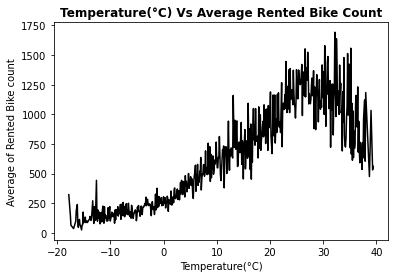

In [16]:
# Average Rented Bike count for various temperatures
simple_plot("Temperature(°C)")

The number of rented bikes grows as the temperature rises, as seen by the line graph. However, the number of rental bikes starts to decline beyond 30 degrees Celsius.

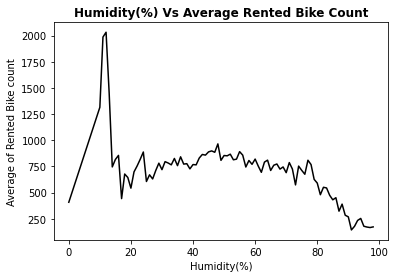

In [17]:
# Average Rented Bike count for various Humidity
simple_plot("Humidity(%)")

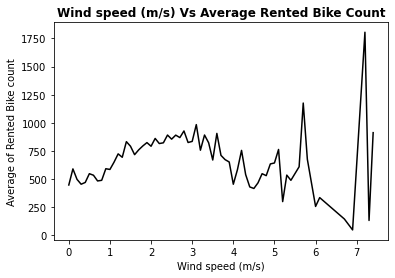

In [18]:
# Average Rented Bike count for different wind speed values
simple_plot("Wind speed (m/s)")

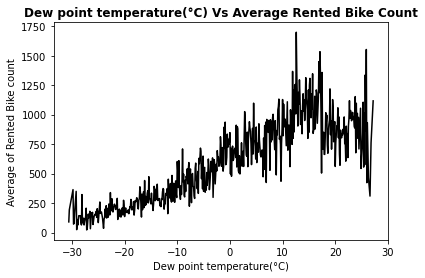

In [19]:
# average Rented Bike count for different dew point temperatures

simple_plot("Dew point temperature(°C)")

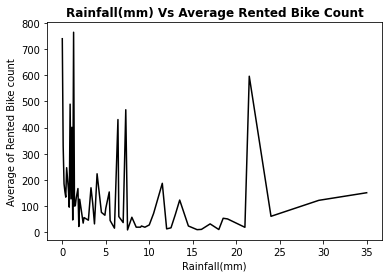

In [20]:
# average Rented Bike count for different rainfall feature

simple_plot("Rainfall(mm)")


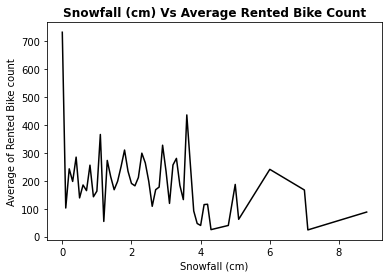

In [21]:
# average Rented Bike count for different snowfall feature

simple_plot("Snowfall (cm)")

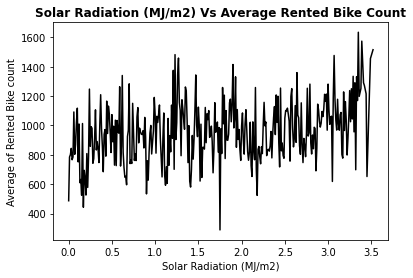

In [22]:
# average Rented Bike count for different solar radiation values
simple_plot("Solar Radiation (MJ/m2)")

Visualization of different Features Distribution

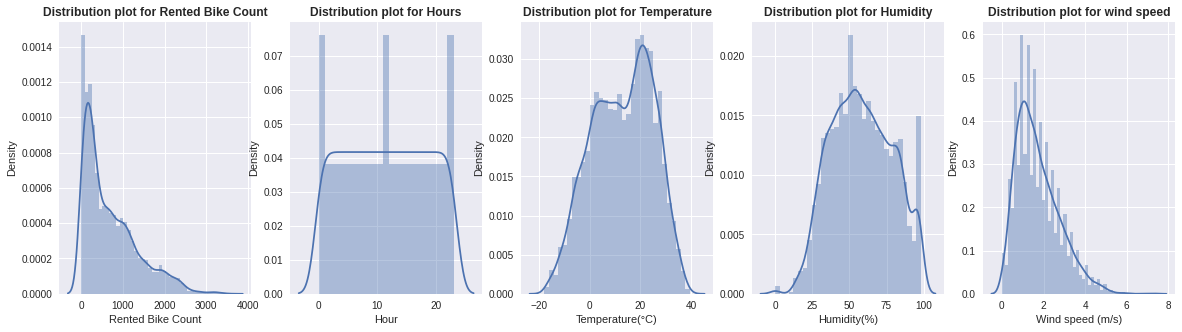

In [23]:
# using distplot to understand data distribution for various features

warnings.filterwarnings('ignore')
plt.style.use('seaborn')
fig, ax = plt.subplots(1,5, figsize=(20,5))
sns.distplot(data['Rented Bike Count'],ax=ax[0])
sns.distplot(data['Hour'],ax=ax[1])
sns.distplot(data['Temperature(°C)'],ax=ax[2])
sns.distplot(data['Humidity(%)'],ax=ax[3])
sns.distplot(data['Wind speed (m/s)'],ax=ax[4])
ax[0].set_title("Distribution plot for Rented Bike Count",fontweight="bold")
ax[1].set_title("Distribution plot for Hours",fontweight="bold")
ax[2].set_title("Distribution plot for Temperature",fontweight="bold")
ax[3].set_title("Distribution plot for Humidity",fontweight="bold")
ax[4].set_title("Distribution plot for wind speed",fontweight="bold")
plt.show()

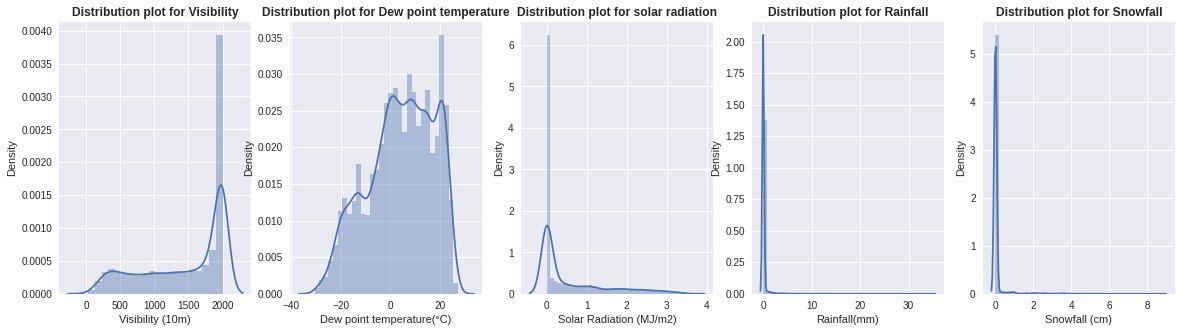

In [24]:
fig, ax = plt.subplots(1,5, figsize=(20,5))
sns.distplot(data['Visibility (10m)'],ax=ax[0])
sns.distplot(data['Dew point temperature(°C)'],ax=ax[1])
sns.distplot(data['Solar Radiation (MJ/m2)'],ax=ax[2])
sns.distplot(data['Rainfall(mm)'],ax=ax[3])
sns.distplot(data['Snowfall (cm)'],ax=ax[4])
ax[0].set_title("Distribution plot for Visibility",fontweight="bold")
ax[1].set_title("Distribution plot for Dew point temperature",fontweight="bold")
ax[2].set_title("Distribution plot for solar radiation",fontweight="bold")
ax[3].set_title("Distribution plot for Rainfall",fontweight="bold")
ax[4].set_title("Distribution plot for Snowfall",fontweight="bold")
plt.show()

In [25]:
# Converting string values of columns to numerical values

data.replace({'Holiday':{'No Holiday':0,'Holiday':1},'Seasons':{'Summer':3,'Spring':2,'Autumn':1,'Winter':0},'Functioning Day':{'Yes':1,'No':0}},inplace=True)

In [26]:
# Creating two more columns to store day of week and month separately using date column

data['Date']=pd.to_datetime(data['Date'],format="%d/%m/%Y")
data['weekday'] = data['Date'].dt.dayofweek
data['month'] = data['Date'].dt.month
data.drop(columns='Date',inplace = True)

Text(0, 0.5, 'Total Rented Bike Count')

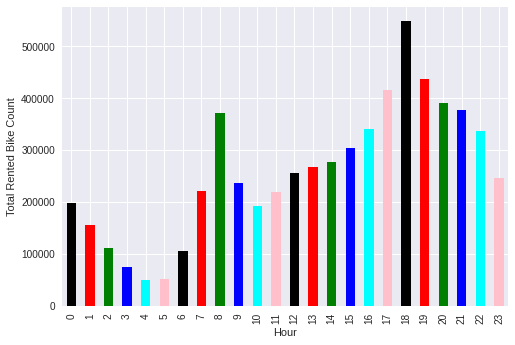

In [27]:
# Plotting graphs to get rented bike count for different hours

data.groupby(['Hour'])['Rented Bike Count'].sum().plot(kind="bar",color=['black', 'red', 'green', 'blue', 'cyan', 'pink'])
plt.ylabel("Total Rented Bike Count")

People travel to or from work primarily around morning 9 AM and evening 7 PM. The increased rental bike count during those hours may therefore be due to this. Additionally, more people prefer to hire bikes when they are leaving work than when they are going.

Text(0, 0.5, 'Total Rented Bike Count')

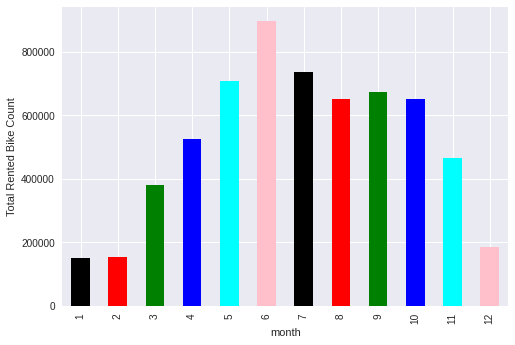

In [28]:
# Plotting graphs to get rented bike count for different months

data.groupby(['month'])['Rented Bike Count'].sum().plot(kind="bar",color=['black', 'red', 'green', 'blue', 'cyan', 'pink'])
plt.ylabel("Total Rented Bike Count")

The most bikes are rented in the month of June. Additionally, the lowest number of bikes are rented in January and February.

weekday
0    911743
1    858596
2    923956
3    861999
4    950334
5    885492
6    780194
Name: Rented Bike Count, dtype: int64


Text(0, 0.5, 'Total Rented Bike Count')

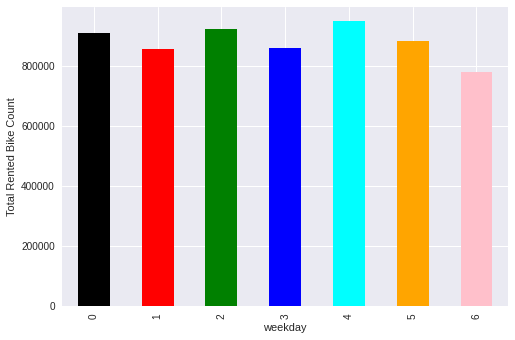

In [29]:
# Plotting graphs to get rented bike count for different weekdays
data.groupby(['weekday'])['Rented Bike Count'].sum().plot(kind="bar",color=['black', 'red', 'green', 'blue', 'cyan','orange','pink'])
print(data.groupby(['weekday'])['Rented Bike Count'].sum())
plt.ylabel("Total Rented Bike Count")

For sundays the rented bikes are used less as compared to other days

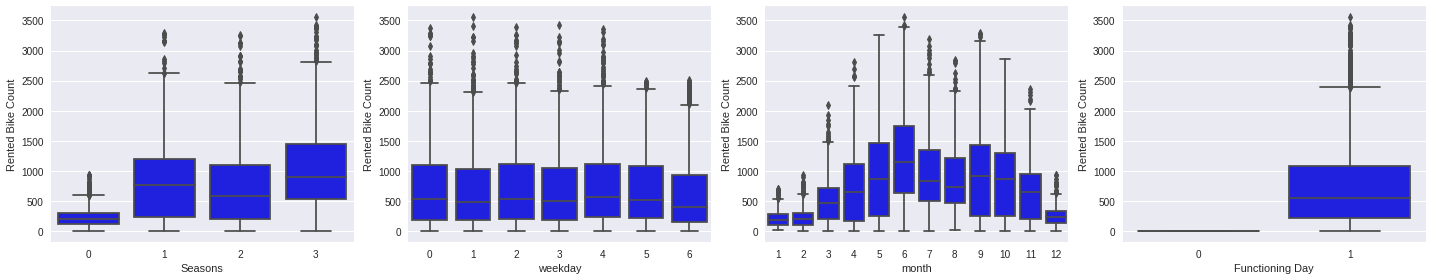

In [30]:
#Creating boxplot to visualize outliers present in features and target variable

def boxplotvar(column_name,ax_1):
  sns.boxplot(data=data,y="Rented Bike Count",x=column_name,orient="v",ax=ax_1,color = 'blue')
fig, (ax1,ax2,ax3,ax4) = plt.subplots(1,4, figsize=(20,4))
boxplotvar('Seasons',ax1)
boxplotvar('weekday',ax2)
boxplotvar('month',ax3)
boxplotvar('Functioning Day',ax4)
fig.tight_layout() 

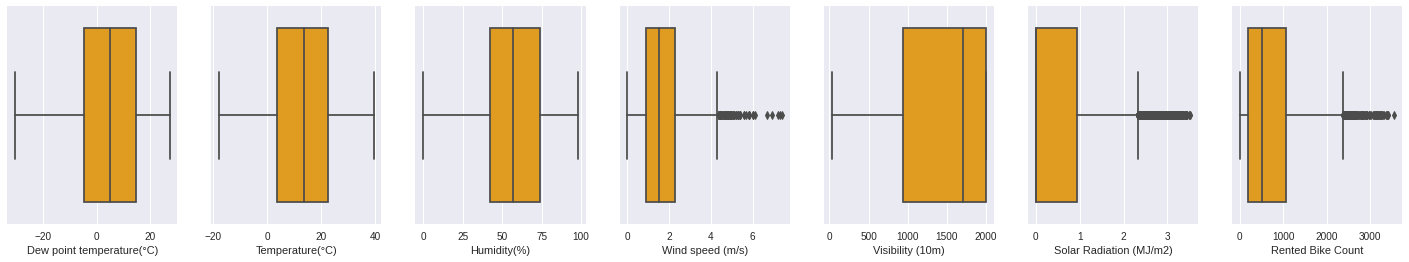

In [31]:
fig, (ax1,ax2,ax3,ax4,ax5,ax6,ax7) = plt.subplots(1,7, figsize=(25,4))
sns.boxplot(x=data['Dew point temperature(°C)'],ax=ax1,color = 'orange')
sns.boxplot(x=data['Temperature(°C)'],ax=ax2,color = 'orange')
sns.boxplot(x=data['Humidity(%)'],ax=ax3,color = 'orange')
sns.boxplot(x=data['Wind speed (m/s)'],ax=ax4,color = 'orange')
sns.boxplot(x=data['Visibility (10m)'],ax=ax5,color = 'orange')
sns.boxplot(x=data['Solar Radiation (MJ/m2)'],ax=ax6,color = 'orange')
sns.boxplot(x=data['Rented Bike Count'],ax=ax7,color = 'orange')

here 'hours', 'temperature','humidity', 'visibility' and 'due point temperature' has no outliers.

1. Any values in wind speed which are greater than 4.5 m/s are outliers
2. Any values in solar radiation which are greater than 2.3 mj/m2 are outliers
3. Any values other than 0 mm in rainfall are outliers
4. Any values other than 0 cm in snowfall are outliers

Not deleting these outliers because, occasionally doing so results in considerable data loss.

###Determining how a dependent variable relates to other independent variables

In [32]:
# defining function 

def relationship(column_name,ax_1):
  sns.scatterplot(x=column_name,y='Rented Bike Count',data=data,ax=ax_1,color = 'BLUE')

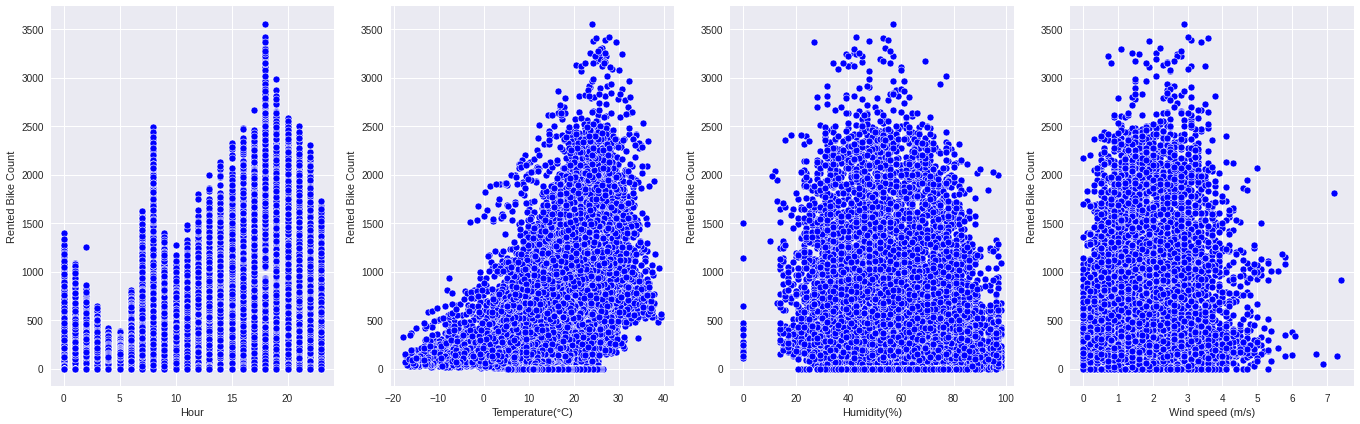

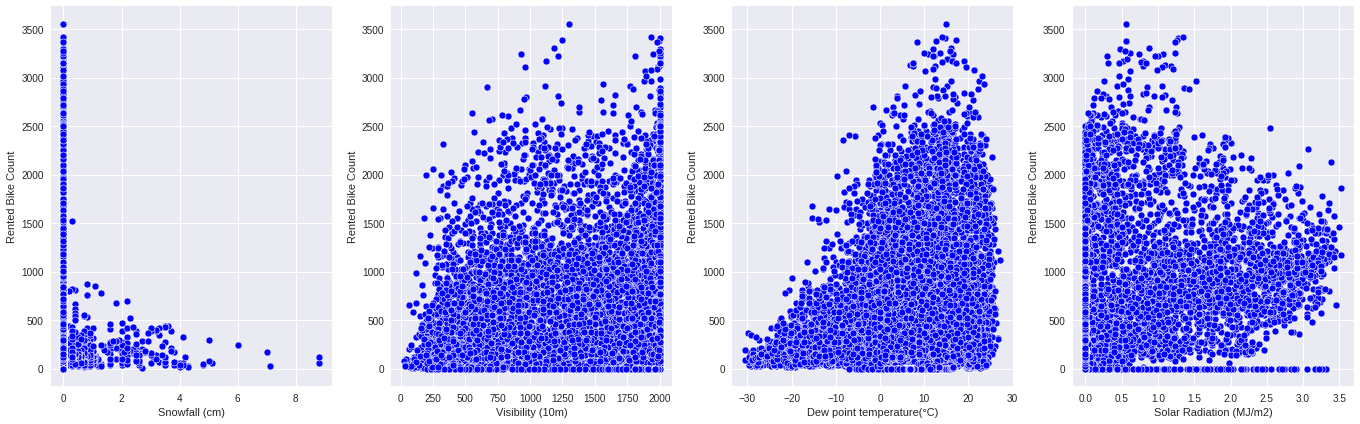

In [33]:
# plotting scatterplots to visualize different features relationship with target variable

fig, (ax1,ax2,ax3,ax4) = plt.subplots(1,4, figsize=(19,6))
relationship('Hour',ax1)
relationship('Temperature(°C)',ax2)
relationship('Humidity(%)',ax3)
relationship('Wind speed (m/s)',ax4)
fig.tight_layout()
fig, (ax1,ax2,ax3,ax4) = plt.subplots(1,4, figsize=(19,6))
relationship('Snowfall (cm)',ax1)
relationship('Visibility (10m)',ax2)
relationship('Dew point temperature(°C)',ax3)
relationship('Solar Radiation (MJ/m2)',ax4)
fig.tight_layout()


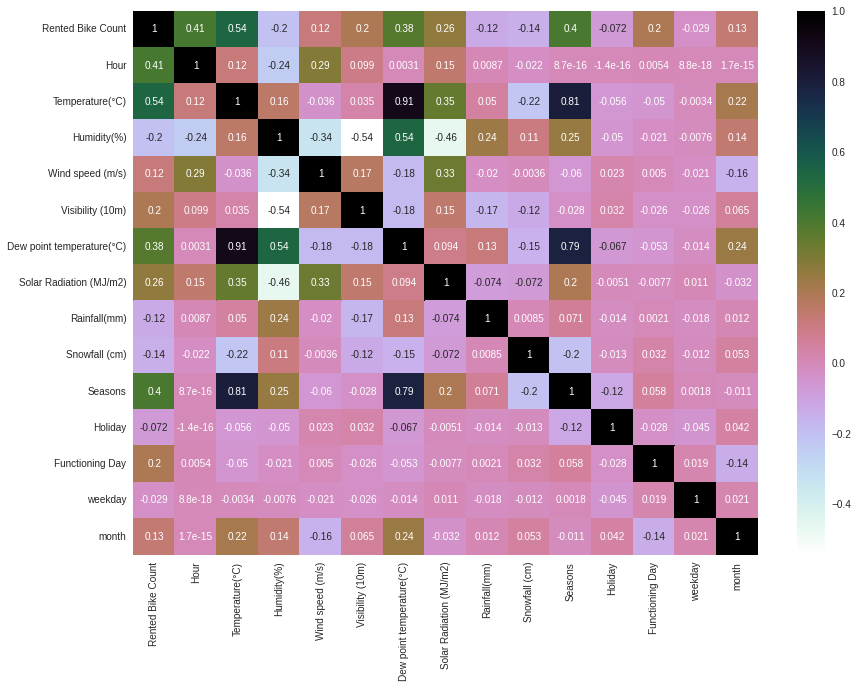

In [34]:
#finding correlation between various independent variables and plotting heatmap

correlation_calc = data.corr()
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_calc,  annot=True, cmap='cubehelix_r')

From correlation heatmap it is clear that only Temperature,Hour,Dew point Temperaure and solar radiation are highly correlated with Rented bike. All other features are less correlated. Temperature has a very high correlation with dew point temperature and hence both has the same variation so dew point temperature can be eliminated.

High correlation between :
1. Temperature and Seasons
2. Temperature and Dew Temperature
3. Dewpoint Temperature and seasons
4. Humidity and dew point temperature

In [35]:
# Removing some columns from dataframe with high correlation

data.drop(columns='Dew point temperature(°C)',inplace =True)
data.drop(columns='Seasons',inplace =True)
data.drop(columns=["Humidity(%)"],inplace=True)

In [36]:
data.shape

(8760, 12)

In [37]:
list(data.columns)

['Rented Bike Count',
 'Hour',
 'Temperature(°C)',
 'Wind speed (m/s)',
 'Visibility (10m)',
 'Solar Radiation (MJ/m2)',
 'Rainfall(mm)',
 'Snowfall (cm)',
 'Holiday',
 'Functioning Day',
 'weekday',
 'month']

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Rented Bike Count        8760 non-null   int64  
 1   Hour                     8760 non-null   int64  
 2   Temperature(°C)          8760 non-null   float64
 3   Wind speed (m/s)         8760 non-null   float64
 4   Visibility (10m)         8760 non-null   int64  
 5   Solar Radiation (MJ/m2)  8760 non-null   float64
 6   Rainfall(mm)             8760 non-null   float64
 7   Snowfall (cm)            8760 non-null   float64
 8   Holiday                  8760 non-null   int64  
 9   Functioning Day          8760 non-null   int64  
 10  weekday                  8760 non-null   int64  
 11  month                    8760 non-null   int64  
dtypes: float64(5), int64(7)
memory usage: 821.4 KB


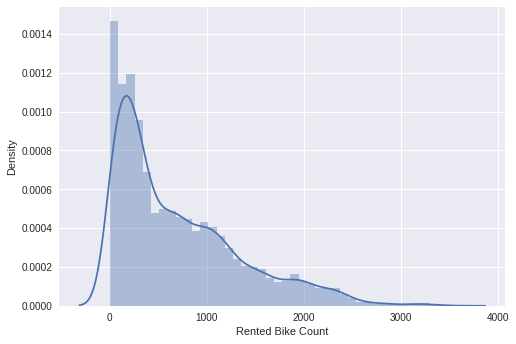

In [39]:
sns.distplot(data['Rented Bike Count'])

In [40]:
x = data[['Hour',
 'Temperature(°C)',
 'Wind speed (m/s)',
 'Visibility (10m)',
 'Solar Radiation (MJ/m2)',
 'Rainfall(mm)',
 'Snowfall (cm)',
 'Holiday',
 'Functioning Day',
 'weekday',
 'month']]

In [41]:
y = data['Rented Bike Count']

In [42]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state= 101)

Training the Model

Now its time to train our model on our training data!

Import LinearRegression from sklearn.linear_model 

In [43]:
from sklearn.linear_model import LinearRegression

Create an instance of a LinearRegression() model named lm.

In [44]:
lm = LinearRegression()

In [45]:
#Train/fit lm on the training data.

lm.fit(X_train,y_train)

LinearRegression()

Print out the coefficients of the model

In [46]:
# The coefficients
print('Coefficients: \n', lm.coef_)

Coefficients: 
 [ 3.04070265e+01  2.65355306e+01  1.46997805e+01  1.36064112e-01
  5.24258979e+00 -7.22272762e+01 -2.88013373e+01 -1.39938126e+02
  8.43440041e+02 -1.25635257e+01  1.20625288e+01]


###Predicting Test Data

Now that we have fit our model, let's evaluate its performance by predicting off the test values!

In [47]:
# predicting train target variable and test target variable both using linear regression model

predictions = lm.predict( X_test)
y_predicted = lm.predict(X_test)
y_train_pred = lm.predict(X_train)

Text(0, 0.5, 'Predicted Y')

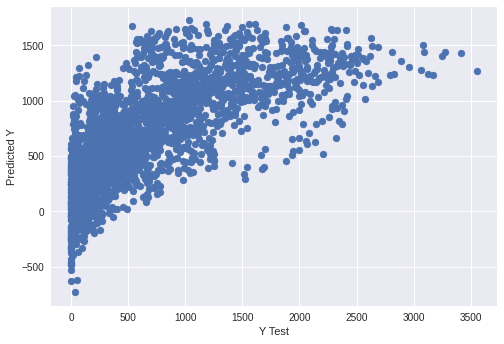

In [48]:
# Create a scatterplot of the real test values versus the predicted values.

plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

## Evaluating the Model

Let's evaluate our model performance by calculating the residual sum of squares and the explained variance score (R^2).

Calculate the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error.

In [49]:
# calculate these metrics by hand!
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 340.3131776303789
MSE: 210880.57353383838
RMSE: 459.2173489033688


###Residuals

You should have gotten a very good model with a good fit. Let's quickly explore the residuals to make sure everything was okay with our data.

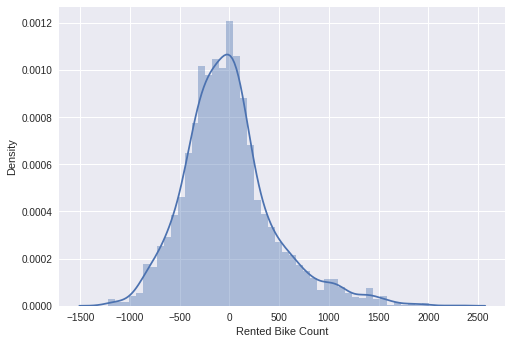

In [51]:
sns.distplot((y_test-predictions),bins=50);

In [52]:
lm.intercept_

-1044.8663995728818

In [53]:
#defining function to print metrics for evaluation of models 
adjusted_r2_list = []
MSE_list = []
RMSE_list = []
MAE_list = []
R2_square_list = []
def print_metrics(actual, predicted,independent_variables):
  print('MSE is {}'.format(mean_squared_error(actual, predicted)))
  print('RMSE is {}'.format(math.sqrt(mean_squared_error(actual, predicted))))
  print('R2 square is {}'.format(r2_score(actual, predicted)))
  print('MAE is {}'.format(mean_absolute_error(actual, predicted)))
  print('Adjusted R2 score is{}'.format(adjusted_r2(len(actual),len(independent_variables), actual, predicted) ))
  adjusted_r2_list.append(adjusted_r2(len(actual),len(independent_variables), actual, predicted))
  MSE_list.append(mean_squared_error(actual, predicted))
  RMSE_list.append(math.sqrt(mean_squared_error(actual, predicted)))
  MAE_list.append(mean_absolute_error(actual, predicted))
  R2_square_list.append(r2_score(actual, predicted))


def adjusted_r2(n, k, actual, predicted):
  return 1 - (((n-1)/(n-k-1))*(1-r2_score(actual, predicted)))  

In [54]:
# checking mean squared error, root mean squared error, R2 square , mean absolute error and adjusted R2 score for train and test data both

print("Evaluation metrics for training data")
print("\n")
print_metrics(y_train,y_train_pred, x)
print("\n")
print("Evaluation metrics for test data")
print("\n")
print_metrics(y_test, y_predicted, x)

Evaluation metrics for training data


MSE is 201743.44262392577
RMSE is 449.15859406664566
R2 square is 0.5132089109583456
MAE is 332.4687428359205
Adjusted R2 score is2.1352286675216368


Evaluation metrics for test data


MSE is 210880.57353383838
RMSE is 459.2173489033688
R2 square is 0.49730965263243376
MAE is 340.3131776303789
Adjusted R2 score is1.2153216276756231


In [55]:
coeffecients = pd.DataFrame(lm.coef_,x.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

Coeffecient
Hour                       30.407027
Temperature(°C)            26.535531
Wind speed (m/s)           14.699780
Visibility (10m)            0.136064
Solar Radiation (MJ/m2)     5.242590
Rainfall(mm)              -72.227276
Snowfall (cm)             -28.801337
Holiday                  -139.938126
Functioning Day           843.440041
weekday                   -12.563526
month                      12.062529

## Conclusion

###Interpreting the coefficients:

Holding all other features fixed, a 1 unit increase in Hour is associated with an increase of 30.41 Rented Bike Count.

Holding all other features fixed, a 1 unit increase in Temperature(°C) is associated with an increase of 26.54 Rented Bike Count.

Holding all other features fixed, a 1 unit increase in Wind speed (m/s) is associated with an increase of 14.70 total dollars spent.

Holding all other features fixed, a 1 unit increase in Visibility (10m) is associated with an increase of 0.14 Rented Bike Count.

Holding all other features fixed, a 1 unit increase in Solar Radiation (MJ/m2) is associated with an increase of 5.24 Rented Bike Count.

Holding all other features fixed, a 1 unit increase in Rainfall (mm) is associated with an increase of -72.23 Rented Bike Count.

Holding all other features fixed, a 1 unit increase in Time on Snowfall (cm) is associated with an increase of -28.80 Rented Bike Count.

Holding all other features fixed, a 1 unit increase in Length of Membership is associated with an increase of 61.27 Rented Bike Count.

Holding all other features fixed, a 1 unit increase in Holiday is associated with an increase of -139.94 Rented Bike Count.

Holding all other features fixed, a 1 unit increase in Functioning Day is associated with an increase of 843.44 Rented Bike Count.

Holding all other features fixed, a 1 unit increase in weekday is associated with an increase of -12.56 Rented Bike Count.

Holding all other features fixed, a 1 unit increase in month is associated with an increase of 12.06 Rented Bike Count.

In [74]:
lm.score(X_test,y_test)

0.49730965263243376

Linear Regression can pridict the future with 49.73 % accuracy.

##Training a Decision Tree Model

Let's start by training a single decision tree first!

In [56]:
# Decision tree regressor to fit training data

reg = DecisionTreeRegressor(criterion='mse',min_samples_split=5,min_samples_leaf=2, random_state=42)
reg.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', min_samples_leaf=2, min_samples_split=5,
                      random_state=42)

In [57]:
# Visualization of how decision tree is implemented for this data

graph = Source(tree.export_graphviz(reg, out_file=None
   , feature_names=X_train.columns,filled= True))
display(SVG(graph.pipe(format='svg')))

Feature: 0, Score: 0.28350
Feature: 1, Score: 0.33455
Feature: 2, Score: 0.01413
Feature: 3, Score: 0.02300
Feature: 4, Score: 0.09753
Feature: 5, Score: 0.07802
Feature: 6, Score: 0.00113
Feature: 7, Score: 0.00369
Feature: 8, Score: 0.09185
Feature: 9, Score: 0.04116
Feature: 10, Score: 0.03144


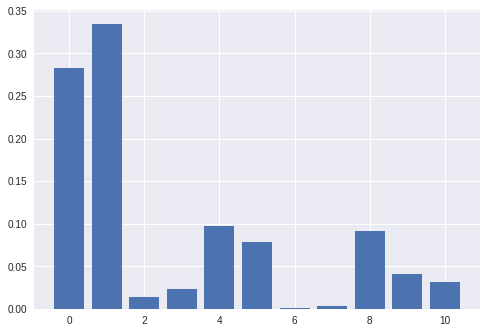

In [58]:
#impact of different features on the predicted value in decision tree model implementation

importance = reg.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

Hour and Temperature are having larger impact. Other features contribution is also visible fron the graph plotted above

###Predictions and Evaluation of Decision Tree

In [59]:
#Evaluation metrics for decsision tree regression model

y_predicted_train = reg.predict(X_train)
print("Evaluation metric for training data")
print("\n")
print_metrics(y_train,y_predicted_train, x)

print("\n")
print("Evaluation metric for testing data")
print("\n")

y_predicted_test = reg.predict(X_test)
print_metrics(y_test,y_predicted_test, x)

Evaluation metric for training data


MSE is 7614.5078413785595
RMSE is 87.26114737601472
R2 square is 0.9816267903610103
MAE is 45.56648184387911
Adjusted R2 score is1.042847526929116


Evaluation metric for testing data


MSE is 59180.02197752832
RMSE is 243.26944316442277
R2 square is 0.8589285617609046
MAE is 140.31751014713342
Adjusted R2 score is1.0604263277766353


In [60]:
reg.score(X_test,y_test)

0.8589285617609046

Decesion Tree can predict the future with 85.89 % accuracy.

In [61]:
y_predicted_train

array([1828.66666667,  890.33333333,  300.        , ...,  849.66666667,
        202.        ,  195.        ])

We are getting very high R2 score and adjusted R2 score values. It can be due to overfitting. Grid search CV can be used for hyperparameter tuning to handle overfitting issues.

##Training the Random Forest model

In [62]:
# storing different values for hyperparameter tuning
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}


In [63]:
# Random Forest regressor implementation

rf = RandomForestRegressor()
# Instantiate the grid search model
model = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)
model.fit(X_train, y_train)

Fitting 3 folds for each of 288 candidates, totalling 864 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [80, 90, 100, 110],
                         'max_features': [2, 3], 'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': [100, 200, 300, 1000]},
             verbose=2)

### Predictions and Evaluation

Let's predict off the y_test values and evaluate our model.

In [64]:
#Evaluation metric for Random Forest Regressor Model

y_predict_train = model.predict(X_train)
y_predict = model.predict(X_test)
print("Evaluation metric for training data")
print("\n")
print_metrics(y_train,y_predict_train, x)
print("\n")
print("Evaluation metric for test data")
print("\n")
print_metrics(y_test,y_predict, x)

Evaluation metric for training data


MSE is 24070.492189036406
RMSE is 155.1466795939778
R2 square is 0.9419197920186574
MAE is 97.555803563179
Adjusted R2 score is1.135446844858734


Evaluation metric for test data


MSE is 44302.900202132856
RMSE is 210.48254132381825
R2 square is 0.8943921674775454
MAE is 135.53343720456724
Adjusted R2 score is1.0452359002179175


In [70]:
rf.fit(X_train, y_train ,sample_weight = 101)

RandomForestRegressor()

In [73]:
rf.score(X_test, y_test)

0.9217765602625135

Random Forest can predict future with 92.18 % accuracy

##Conclusion

We have analyzed Seoul city bike sharing dataset. Through analysis, we saw that in general the number of bike rents in 2018 was more than in 2017. The highest number of bike rents occur in summer while the least bike rents occur in winter. In daily basis, the trend of bike rents is almost similar with slight peaking demands on Thursday while drops on Sunday. In hourly basis, the bike counts peak in the afternoon (from 15.00 to 20.00). There are two peak occurences, at 7.00 and at 17.00, which is most likely to be caused by workers going to office in the morning and going back home in the afternoon.

The hourly movement of bike counts seems to correlate with temperature, visibility, windspeed, and humidity. The bike counts peak in the afternoon (from 15.00 to 20.00) where temperature is the highest, with the most visibility, windspeed, and least humidity. There were days in a weekday when the bike sharing facility was not functioning. However, during public holidays, the facility was still operating.

Based on this analysis,
Future events can be predicted with 49.73% accuracy using linear regression.
With an accuracy rate of 85.69%, decision trees can forecast the future.
Random Forest has a 92.18% accuracy rate for future prediction.